In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('dataset/Bala_classification_dataset.csv')
df

,Compound,x(BiMe1Me2)O3,Me1,Me2,Me3,frac-Me1,frac-Me2,frac-Me3,PT-content,Tolerance_Factor,Valence_Electron_Number,Martynov_Batsanov_Electronegativity,Ideal_Bond_Length_Sum,Mendeleev_Number,Formability
0,Bi(GaSc),0.45,Ga,Sc,Ti,0.250000,0.750000,0.0,0.55,0.9813,8.000,3.7395,3.9208,118.9375,No
1,Bi(GaSc),0.40,Ga,Sc,Ti,0.250000,0.750000,0.0,0.60,0.9864,8.000,3.7440,3.9215,119.5000,No
2,Bi(GaSc),0.38,Ga,Sc,Ti,0.250000,0.750000,0.0,0.62,0.9884,8.000,3.7458,3.9218,119.7250,No
3,Bi(GaSc),0.36,Ga,Sc,Ti,0.250000,0.750000,0.0,0.64,0.9904,8.000,3.7476,3.9221,119.9500,No
4,Bi(GaSc),0.30,Ga,Sc,Ti,0.250000,0.750000,0.0,0.70,0.9966,8.000,3.7530,3.9229,120.6250,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,BiScIn,0.37,Sc,In,Ti,0.864865,0.135135,0.0,0.63,0.9831,8.000,3.7347,3.9356,117.2100,Yes
188,BiCoFe,0.70,Co,Fe,Ti,0.270000,0.730000,0.0,0.30,0.9812,11.689,3.8105,3.8481,136.4670,No
189,Bi(GaSc),0.25,Sc,Ga,Ti,0.470000,0.530000,0.0,0.75,1.0057,8.000,3.7715,3.9152,125.5975,Yes
190,BiCoFe,0.20,Co,Fe,Ti,0.880000,0.120000,0.0,0.80,1.0162,9.176,3.7948,3.8905,127.9280,Yes


In [3]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.head()

,x(BiMe1Me2)O3,frac-Me1,frac-Me2,frac-Me3,PT-content,Tolerance_Factor,Valence_Electron_Number,Martynov_Batsanov_Electronegativity,Ideal_Bond_Length_Sum,Mendeleev_Number
0,0.45,0.25,0.75,0.0,0.55,0.9813,8.0,3.7395,3.9208,118.9375
1,0.40,0.25,0.75,0.0,0.60,0.9864,8.0,3.7440,3.9215,119.5000
2,0.38,0.25,0.75,0.0,0.62,0.9884,8.0,3.7458,3.9218,119.7250
3,0.36,0.25,0.75,0.0,0.64,0.9904,8.0,3.7476,3.9221,119.9500
4,0.30,0.25,0.75,0.0,0.70,0.9966,8.0,3.7530,3.9229,120.6250


In [4]:
df_category = df.select_dtypes(exclude=[np.number])
df_category.head()

,Compound,Me1,Me2,Me3,Formability
0,Bi(GaSc),Ga,Sc,Ti,No
1,Bi(GaSc),Ga,Sc,Ti,No
2,Bi(GaSc),Ga,Sc,Ti,No
3,Bi(GaSc),Ga,Sc,Ti,No
4,Bi(GaSc),Ga,Sc,Ti,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_category.columns:
    df[col] = le.fit_transform(df[col])
df

,Compound,x(BiMe1Me2)O3,Me1,Me2,Me3,frac-Me1,frac-Me2,frac-Me3,PT-content,Tolerance_Factor,Valence_Electron_Number,Martynov_Batsanov_Electronegativity,Ideal_Bond_Length_Sum,Mendeleev_Number,Formability
0,1,0.45,2,7,0,0.250000,0.750000,0.0,0.55,0.9813,8.000,3.7395,3.9208,118.9375,0
1,1,0.40,2,7,0,0.250000,0.750000,0.0,0.60,0.9864,8.000,3.7440,3.9215,119.5000,0
2,1,0.38,2,7,0,0.250000,0.750000,0.0,0.62,0.9884,8.000,3.7458,3.9218,119.7250,0
3,1,0.36,2,7,0,0.250000,0.750000,0.0,0.64,0.9904,8.000,3.7476,3.9221,119.9500,0
4,1,0.30,2,7,0,0.250000,0.750000,0.0,0.70,0.9966,8.000,3.7530,3.9229,120.6250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,21,0.37,8,2,0,0.864865,0.135135,0.0,0.63,0.9831,8.000,3.7347,3.9356,117.2100,1
188,13,0.70,0,0,0,0.270000,0.730000,0.0,0.30,0.9812,11.689,3.8105,3.8481,136.4670,0
189,1,0.25,8,1,0,0.470000,0.530000,0.0,0.75,1.0057,8.000,3.7715,3.9152,125.5975,1
190,13,0.20,0,0,0,0.880000,0.120000,0.0,0.80,1.0162,9.176,3.7948,3.8905,127.9280,1


In [6]:
from hyperimpute.plugins.imputers import Imputers, ImputerPlugin
from Impute import fill_with_et

imputers = Imputers()


class EtImputer(ImputerPlugin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._model = fill_with_et

    @staticmethod
    def name():
        return "et"

    @staticmethod
    def hyperparameter_space():
        return []

    def _fit(self, *args, **kwargs):
        return self

    def _transform(self, df):
        # 按照缺失值的比例进行排序
        miss_rate = df.isnull().sum() / df.shape[0]
        cols = miss_rate.sort_values().index.tolist()
        cols = [col for col in cols if miss_rate[col] > 0]
        for col in cols:
            df_col_filled = self._model(df, col)
            df[col] = df_col_filled[col]
        return df


imputers.add("et", EtImputer)

hyper = imputers.get("hyperimpute", n_inner_iter=1)
et = imputers.get("et")
missforest = imputers.get("missforest", max_iter=1)
gain = imputers.get("gain", n_epochs=10)
sinkhorn = imputers.get("sinkhorn", n_epochs=10)
mean = imputers.get("mean")

d:\software\miniconda\Lib\site-packages\pydantic\_internal\_fields.py:149: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [7]:
target_col = 'Formability'

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from hyperimpute.plugins.utils.simulate import simulate_nan
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from hyperimpute.plugins.utils.simulate import simulate_nan
import warnings

warnings.filterwarnings("ignore")

X = df.drop(labels=[target_col], axis=1)
y = df[target_col]
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
original_scores = []
matimpute_scores = []
hyperimpute_scores = []
missforest_scores = []
gain_scores = []
sinkhorn_scores = []
mean_scores = []

for ratio in [0.1, 0.2, 0.3, 0.4, 0.5]:
    original_score = []
    matimpute_score = []
    hyperimpute_score = []
    missforest_score = []
    gain_score = []
    sinkhorn_score = []
    mean_score = []

    for i, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        df_train = pd.concat([X_train, y_train], axis=1)
        df_test = pd.concat([X_test, y_test], axis=1)
        # reset the index
        df_train = df_train.reset_index(drop=True)
        df_test = df_test.reset_index(drop=True)
        X_train = df_train.drop(labels=[target_col], axis=1)
        y_train = df_train[target_col]
        X_test = df_test.drop(labels=[target_col], axis=1)
        y_test = df_test[target_col]

        cols = X_train.columns
        X_train = X_train.to_numpy()
        X_train_nan = simulate_nan(X_train, ratio)['X_incomp']
        X_train_nan = pd.DataFrame(X_train_nan, columns=cols)

        X_train_imputed_hyper = hyper.fit_transform(X_train_nan.copy())
        X_train_imputed_et = et.fit_transform(X_train_nan.copy())
        X_train_imputed_missforest = missforest.fit_transform(X_train_nan.copy())
        X_train_imputed_gain = gain.fit_transform(X_train_nan.copy())
        X_train_imputed_sinkhorn = sinkhorn.fit_transform(X_train_nan.copy())
        X_train_imputed_mean = mean.fit_transform(X_train_nan.copy())

        clf_original = RandomForestClassifier(n_estimators=500)
        clf_original.fit(X_train, y_train)
        y_pred_original = clf_original.predict(X_test)
        original_score.append(accuracy_score(y_test, y_pred_original))

        clf_et = RandomForestClassifier(n_estimators=500)
        clf_et.fit(X_train_imputed_et, y_train)
        y_pred_et = clf_et.predict(X_test)
        matimpute_score.append(accuracy_score(y_test, y_pred_et))
        
        clf_hyper = RandomForestClassifier(n_estimators=500)
        clf_hyper.fit(X_train_imputed_hyper, y_train)
        y_pred_hyper = clf_hyper.predict(X_test)
        hyperimpute_score.append(accuracy_score(y_test, y_pred_hyper))


        clf_missforest = RandomForestClassifier(n_estimators=500)
        clf_missforest.fit(X_train_imputed_missforest, y_train)
        y_pred_missforest = clf_missforest.predict(X_test)
        missforest_score.append(accuracy_score(y_test, y_pred_missforest))

        clf_gain = RandomForestClassifier(n_estimators=500)
        clf_gain.fit(X_train_imputed_gain, y_train)
        y_pred_gain = clf_gain.predict(X_test)
        gain_score.append(accuracy_score(y_test, y_pred_gain))


        clf_sinkhorn = RandomForestClassifier(n_estimators=500)
        clf_sinkhorn.fit(X_train_imputed_sinkhorn, y_train)
        y_pred_sinkhorn = clf_sinkhorn.predict(X_test)
        sinkhorn_score.append(accuracy_score(y_test, y_pred_sinkhorn))


        clf_mean = RandomForestClassifier(n_estimators=500)
        clf_mean.fit(X_train_imputed_mean, y_train)
        y_pred_mean = clf_mean.predict(X_test)
        mean_score.append(accuracy_score(y_test, y_pred_mean))
    original_scores.append(original_score)
    matimpute_scores.append(matimpute_score)
    hyperimpute_scores.append(hyperimpute_score)
    missforest_scores.append(missforest_score)
    gain_scores.append(gain_score)
    sinkhorn_scores.append(sinkhorn_score)
    mean_scores.append(mean_score)


In [9]:
# save the results

results = [
    original_scores,
    matimpute_scores,
    hyperimpute_scores,
    missforest_scores,
    gain_scores,
    sinkhorn_scores,
    mean_scores
]

# save to npy file
np.save("results/result_cls_bala.npy", results)

In [15]:
results[2]

[[0.9743589743589743,
  0.9230769230769231,
  0.8421052631578947,
  0.9210526315789473,
  0.868421052631579],
 [0.8205128205128205,
  0.8974358974358975,
  0.8157894736842105,
  0.9210526315789473,
  0.8421052631578947],
 [0.7948717948717948,
  0.9230769230769231,
  0.8421052631578947,
  0.868421052631579,
  0.868421052631579],
 [0.7948717948717948,
  0.8974358974358975,
  0.8157894736842105,
  0.8947368421052632,
  0.7105263157894737],
 [0.8461538461538461,
  0.9230769230769231,
  0.7894736842105263,
  0.7631578947368421,
  0.8157894736842105]]

In [14]:
results[0]

[[0.9743589743589743,
  0.9230769230769231,
  0.8421052631578947,
  0.9210526315789473,
  0.7894736842105263],
 [0.9743589743589743,
  0.9230769230769231,
  0.8421052631578947,
  0.9210526315789473,
  0.7894736842105263],
 [0.9743589743589743,
  0.9230769230769231,
  0.8421052631578947,
  0.9210526315789473,
  0.7894736842105263],
 [0.9743589743589743,
  0.9230769230769231,
  0.8421052631578947,
  0.9210526315789473,
  0.7894736842105263],
 [0.9743589743589743,
  0.9230769230769231,
  0.8421052631578947,
  0.9210526315789473,
  0.7894736842105263]]

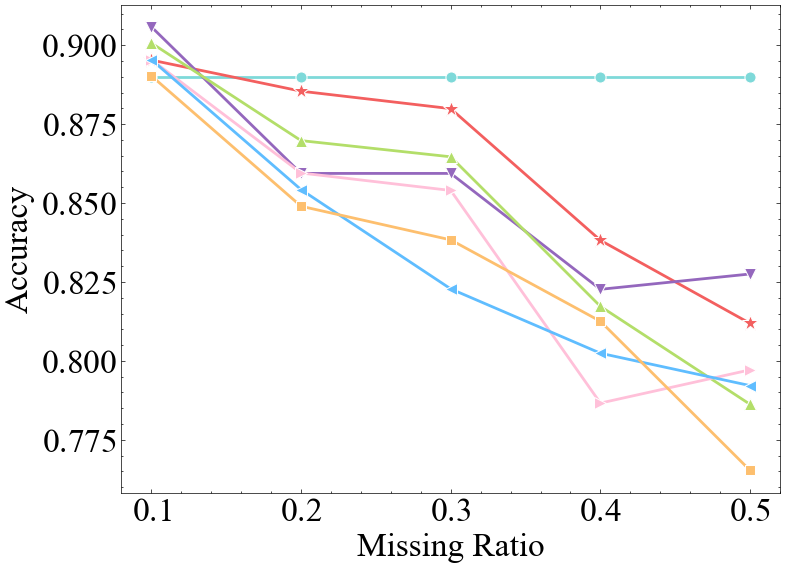

In [80]:
# # plot the results
# import scienceplots

# plt.style.use('default')
# plt.style.use(['science','no-latex'])
# # set font as times new roman
# plt.rcParams["font.family"] = "Times New Roman"

# plt.figure(figsize=(8, 6))

# # set no grid
# plt.grid(False)

# sns.lineplot(x=[0.1, 0.2, 0.3, 0.4, 0.5], y=original_scores, label='Original', marker='o',color='#7ED9D9',lw=2, markersize=8)
# sns.lineplot(x=[0.1, 0.2, 0.3, 0.4, 0.5], y=matimpute_scores, label='MatImpute', marker='*',color='#F35F5F',lw=2, markersize=12)
# sns.lineplot(x=[0.1, 0.2, 0.3, 0.4, 0.5], y=hyperimpute_scores, label='HyperImpute', marker='v',color='#9467BD',lw=2, markersize=8)
# sns.lineplot(x=[0.1, 0.2, 0.3, 0.4, 0.5], y=missforest_scores, label='MissForest', marker='^',color='#B3DE69',lw=2, markersize=8)
# sns.lineplot(x=[0.1, 0.2, 0.3, 0.4, 0.5], y=gain_scores, label='Gain', marker='>',color='#FFC0D9',lw=2, markersize=8)
# sns.lineplot(x=[0.1, 0.2, 0.3, 0.4, 0.5], y=sinkhorn_scores, label='Sinkhorn', marker='<',color='#5FBDFF',lw=2, markersize=8)
# sns.lineplot(x=[0.1, 0.2, 0.3, 0.4, 0.5], y=mean_scores, label='Mean', marker='s',color='#FDBF6E',lw=2, markersize=7)

# plt.xlabel('Missing Ratio', fontsize=24)
# plt.ylabel('Accuracy',fontsize=24)
# plt.tick_params(labelsize=24)
# plt.legend([])
# plt.tight_layout(pad=1.5)
# plt.savefig("results/missing_ratio_cls_bala.png", dpi=300)

In [8]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# from hyperimpute.plugins.utils.simulate import simulate_nan
# from sklearn.metrics import accuracy_score, f1_score
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import scienceplots
# from sklearn.preprocessing import LabelEncoder
# from hyperimpute.plugins.utils.simulate import simulate_nan
# import warnings

# warnings.filterwarnings("ignore")

# sns.set_theme(style="whitegrid")

# plt.style.use(['nature', 'grid'])
# # set font as times new roman
# plt.rcParams["font.family"] = "Times New Roman"
# plt.figure(figsize=(8, 6))
# np.random.seed(42)



# et_all_test_preds = []
# et_all_scores = []
# et_all_f1_scores = []

# hyper_all_test_preds = []
# hyper_all_scores = []
# hyper_all_f1_scores = []

# missforest_all_test_preds = []
# missforest_all_scores = []
# missforest_all_f1_scores = []

# ori_all_test_preds = []
# ori_all_scores = []
# ori_all_f1_scores = []

# gain_all_test_preds = []
# gain_all_scores = []
# gain_all_f1_scores = []

# sinkhorn_all_test_preds = []
# sinkhorn_all_scores = []
# sinkhorn_all_f1_scores = []

# mean_all_test_preds = []
# mean_all_scores = []
# mean_all_f1_scores = []

# y_test_all = []

# for i, (train_idx, test_idx) in enumerate(kf.split(X, y)):
#     X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#     y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
#     df_train = pd.concat([X_train, y_train], axis=1)
#     df_test = pd.concat([X_test, y_test], axis=1)
#     # reset the index
#     df_train = df_train.reset_index(drop=True)
#     df_test = df_test.reset_index(drop=True)
#     X_train = df_train.drop(labels=[target_col], axis=1)
#     y_train = df_train[target_col]
#     X_test = df_test.drop(labels=[target_col], axis=1)
#     y_test = df_test[target_col]

#     cols = X_train.columns
#     X_train = X_train.to_numpy()
#     X_train_nan = simulate_nan(X_train, 0.1)['X_incomp']
#     X_train_nan = pd.DataFrame(X_train_nan, columns=cols)

#     X_train_imputed_hyper = hyper.fit_transform(X_train_nan.copy())
#     X_train_imputed_et = et.fit_transform(X_train_nan.copy())
#     X_train_imputed_missforest = missforest.fit_transform(X_train_nan.copy())
#     X_train_imputed_gain = gain.fit_transform(X_train_nan.copy())
#     X_train_imputed_sinkhorn = sinkhorn.fit_transform(X_train_nan.copy())
#     X_train_imputed_mean = mean.fit_transform(X_train_nan.copy())

#     clf_hyper = RandomForestClassifier(n_estimators=500)
#     clf_hyper.fit(X_train_imputed_hyper, y_train)
#     y_pred_hyper = clf_hyper.predict(X_test)
#     print("Accuracy (hyperimpute):", accuracy_score(y_test, y_pred_hyper))
#     hyper_all_scores.append(accuracy_score(y_test, y_pred_hyper))
#     hyper_all_test_preds.extend(y_pred_hyper)
#     hyper_all_f1_scores.append(f1_score(y_test, y_pred_hyper, average='weighted'))

#     clf_et = RandomForestClassifier(n_estimators=500)
#     clf_et.fit(X_train_imputed_et, y_train)
#     y_pred_et = clf_et.predict(X_test)
#     print("Accuracy (et):", accuracy_score(y_test, y_pred_et))
#     et_all_scores.append(accuracy_score(y_test, y_pred_et))
#     et_all_test_preds.extend(y_pred_et)
#     et_all_f1_scores.append(f1_score(y_test, y_pred_et, average='weighted'))

#     clf_missforest = RandomForestClassifier(n_estimators=500)
#     clf_missforest.fit(X_train_imputed_missforest, y_train)
#     y_pred_missforest = clf_missforest.predict(X_test)
#     print("Accuracy (missforest):", accuracy_score(y_test, y_pred_missforest))
#     missforest_all_scores.append(accuracy_score(y_test, y_pred_missforest))
#     missforest_all_test_preds.extend(y_pred_missforest)
#     missforest_all_f1_scores.append(f1_score(y_test, y_pred_missforest, average='weighted'))

#     clf_original = RandomForestClassifier(n_estimators=500)
#     clf_original.fit(X_train, y_train)
#     y_pred_original = clf_original.predict(X_test)
#     print("Accuracy (original):", accuracy_score(y_test, y_pred_original))
#     ori_all_scores.append(accuracy_score(y_test, y_pred_original))
#     ori_all_test_preds.extend(y_pred_original)
#     ori_all_f1_scores.append(f1_score(y_test, y_pred_original, average='weighted'))

#     clf_gain = RandomForestClassifier(n_estimators=500)
#     clf_gain.fit(X_train_imputed_gain, y_train)
#     y_pred_gain = clf_gain.predict(X_test)
#     print("Accuracy (gain):", accuracy_score(y_test, y_pred_gain))
#     gain_all_scores.append(accuracy_score(y_test, y_pred_gain))
#     gain_all_test_preds.extend(y_pred_gain)
#     gain_all_f1_scores.append(f1_score(y_test, y_pred_gain, average='weighted'))

#     clf_sinkhorn = RandomForestClassifier(n_estimators=500)
#     clf_sinkhorn.fit(X_train_imputed_sinkhorn, y_train)
#     y_pred_sinkhorn = clf_sinkhorn.predict(X_test)
#     print("Accuracy (sinkhorn):", accuracy_score(y_test, y_pred_sinkhorn))
#     sinkhorn_all_scores.append(accuracy_score(y_test, y_pred_sinkhorn))
#     sinkhorn_all_test_preds.extend(y_pred_sinkhorn)
#     sinkhorn_all_f1_scores.append(f1_score(y_test, y_pred_sinkhorn, average='weighted'))

#     clf_mean = RandomForestClassifier(n_estimators=500)
#     clf_mean.fit(X_train_imputed_mean, y_train)
#     y_pred_mean = clf_mean.predict(X_test)
#     print("Accuracy (mean):", accuracy_score(y_test, y_pred_mean))
#     mean_all_scores.append(accuracy_score(y_test, y_pred_mean))
#     mean_all_test_preds.extend(y_pred_mean)
#     mean_all_f1_scores.append(f1_score(y_test, y_pred_mean, average='weighted'))

#     y_test_all.extend(y_test)
#     print(f"fold {i}=====================================")

Accuracy (hyperimpute): 0.9743589743589743
Accuracy (et): 0.9743589743589743
Accuracy (missforest): 0.9743589743589743
Accuracy (original): 0.9743589743589743
Accuracy (gain): 0.9743589743589743
Accuracy (sinkhorn): 0.9487179487179487
Accuracy (mean): 0.9487179487179487
fold 0=====================================
Accuracy (hyperimpute): 0.9230769230769231
Accuracy (et): 0.9230769230769231
Accuracy (missforest): 0.9230769230769231
Accuracy (original): 0.9230769230769231
Accuracy (gain): 0.9230769230769231
Accuracy (sinkhorn): 0.8974358974358975
Accuracy (mean): 0.8974358974358975
fold 1=====================================
Accuracy (hyperimpute): 0.8421052631578947
Accuracy (et): 0.8421052631578947
Accuracy (missforest): 0.8421052631578947
Accuracy (original): 0.868421052631579
Accuracy (gain): 0.8421052631578947
Accuracy (sinkhorn): 0.868421052631579
Accuracy (mean): 0.8421052631578947
fold 2=====================================
Accuracy (hyperimpute): 0.9210526315789473
Accuracy (et):

<Figure size 800x600 with 0 Axes>

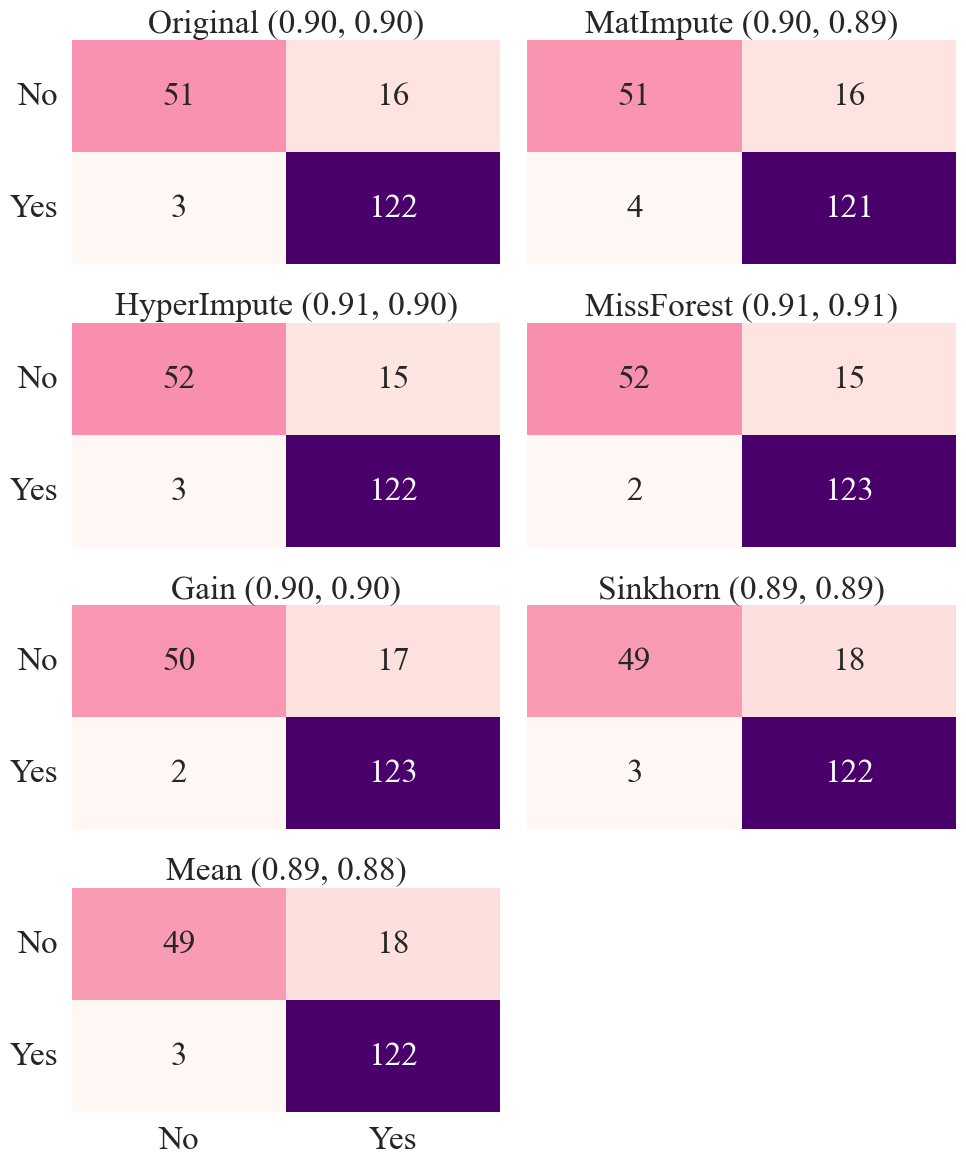

In [9]:
# # plot confusion matrix
# from sklearn.metrics import confusion_matrix

# fig, axs = plt.subplots(4, 2, figsize=(10, 12), sharex=True, sharey=True)
# sns.set_theme(style="whitegrid", font_scale=1.5, font="Times New Roman")

# axs = axs.flatten()

# confusion_matrix_et = confusion_matrix(y_test_all, et_all_test_preds)
# confusion_matrix_original = confusion_matrix(y_test_all, ori_all_test_preds)
# confusion_matrix_hyper = confusion_matrix(y_test_all, hyper_all_test_preds)
# confusion_matrix_missforest = confusion_matrix(y_test_all, missforest_all_test_preds)
# confusion_matrix_gain = confusion_matrix(y_test_all, gain_all_test_preds)
# confusion_matrix_sinkhorn = confusion_matrix(y_test_all, sinkhorn_all_test_preds)
# confusion_matrix_mean = confusion_matrix(y_test_all, mean_all_test_preds)
# cms = [confusion_matrix_original, confusion_matrix_et, confusion_matrix_hyper, confusion_matrix_missforest,
#        confusion_matrix_gain, confusion_matrix_sinkhorn, confusion_matrix_mean]

# methods = ["Original", "MatImpute", "HyperImpute", "MissForest", "Gain", "Sinkhorn", "Mean"]
# scores = [ori_all_scores, et_all_scores, hyper_all_scores, missforest_all_scores, gain_all_scores, sinkhorn_all_scores,
#           mean_all_scores]
# f1_scores = [ori_all_f1_scores, et_all_f1_scores, hyper_all_f1_scores, missforest_all_f1_scores, gain_all_f1_scores,
#              sinkhorn_all_f1_scores, mean_all_f1_scores]

# for i, ax in enumerate(axs[:len(cms)]):
#     sns.heatmap(cms[i], annot=True, fmt='d', cmap='RdPu', ax=axs[i], xticklabels=le.classes_.tolist(),
#                 yticklabels=le.classes_.tolist(), cbar=False, annot_kws={"size": 24})
#     axs[i].set_title(
#         "{} ({:.2f}, {:.2f})".format(methods[i], np.mean(scores[i]), np.mean(f1_scores[i])),fontsize=24)
#     axs[i].tick_params(axis='x', labelsize=24)
#     axs[i].tick_params(axis='y', labelsize=24, rotation=0)
# # del the reamining axes
# for i in range(len(cms), len(axs)):
#     fig.delaxes(axs[i])

# fig.tight_layout()
# plt.savefig("results/pipeline_cls_bala.png", dpi=300)

In [10]:
# print("Accuracy (hyperimpute): {:.2f} ± {:.2f}".format(np.mean(hyper_all_scores), np.std(hyper_all_scores)))
# print("Accuracy (et): {:.2f} ± {:.2f}".format(np.mean(et_all_scores), np.std(et_all_scores)))
# print("Accuracy (missforest): {:.2f} ± {:.2f}".format(np.mean(missforest_all_scores), np.std(missforest_all_scores)))
# print("Accuracy (original): {:.2f} ± {:.2f}".format(np.mean(ori_all_scores), np.std(ori_all_scores)))
# print("Accuracy (gain): {:.2f} ± {:.2f}".format(np.mean(gain_all_scores), np.std(gain_all_scores)))
# print("Accuracy (sinkhorn): {:.2f} ± {:.2f}".format(np.mean(sinkhorn_all_scores), np.std(sinkhorn_all_scores)))
# print("Accuracy (mean): {:.2f} ± {:.2f}".format(np.mean(mean_all_scores), np.std(mean_all_scores)))

Accuracy (hyperimpute): 0.91 ± 0.05
Accuracy (et): 0.90 ± 0.06
Accuracy (missforest): 0.91 ± 0.05
Accuracy (original): 0.90 ± 0.05
Accuracy (gain): 0.90 ± 0.06
Accuracy (sinkhorn): 0.89 ± 0.05
Accuracy (mean): 0.89 ± 0.05


In [11]:
# print("F1 Score (hyperimpute): {:.2f} ± {:.2f}".format(np.mean(hyper_all_f1_scores), np.std(hyper_all_f1_scores)))
# print("F1 Score (et): {:.2f} ± {:.2f}".format(np.mean(et_all_f1_scores), np.std(et_all_f1_scores)))
# print("F1 Score (missforest): {:.2f} ± {:.2f}".format(np.mean(missforest_all_f1_scores),
#                                                       np.std(missforest_all_f1_scores)))
# print("F1 Score (original): {:.2f} ± {:.2f}".format(np.mean(ori_all_f1_scores), np.std(ori_all_f1_scores)))
# print("F1 Score (gain): {:.2f} ± {:.2f}".format(np.mean(gain_all_f1_scores), np.std(gain_all_f1_scores)))
# print("F1 Score (sinkhorn): {:.2f} ± {:.2f}".format(np.mean(sinkhorn_all_f1_scores), np.std(sinkhorn_all_f1_scores)))
# print("F1 Score (mean): {:.2f} ± {:.2f}".format(np.mean(mean_all_f1_scores), np.std(mean_all_f1_scores)))

F1 Score (hyperimpute): 0.90 ± 0.05
F1 Score (et): 0.89 ± 0.06
F1 Score (missforest): 0.91 ± 0.05
F1 Score (original): 0.90 ± 0.06
F1 Score (gain): 0.90 ± 0.07
F1 Score (sinkhorn): 0.89 ± 0.05
F1 Score (mean): 0.88 ± 0.06


In [12]:
# print("Accuracy (hyperimpute):", hyper_all_scores)
# print("Accuracy (et):", et_all_scores)
# print("Accuracy (missforest):", missforest_all_scores)
# print("Accuracy (original):", ori_all_scores)
# print("Accuracy (gain):", gain_all_scores)
# print("Accuracy (sinkhorn):", sinkhorn_all_scores)
# print("Accuracy (mean):", mean_all_scores)
# print("=========================================")
# print("F1 Score (hyperimpute):", hyper_all_f1_scores)
# print("F1 Score (et):", et_all_f1_scores)
# print("F1 Score (missforest):", missforest_all_f1_scores)
# print("F1 Score (original):", ori_all_f1_scores)
# print("F1 Score (gain):", gain_all_f1_scores)
# print("F1 Score (sinkhorn):", sinkhorn_all_f1_scores)
# print("F1 Score (mean):", mean_all_f1_scores)

Accuracy (hyperimpute): [0.9743589743589743, 0.9230769230769231, 0.8421052631578947, 0.9210526315789473, 0.868421052631579]
Accuracy (et): [0.9743589743589743, 0.9230769230769231, 0.8421052631578947, 0.9210526315789473, 0.8157894736842105]
Accuracy (missforest): [0.9743589743589743, 0.9230769230769231, 0.8421052631578947, 0.9473684210526315, 0.868421052631579]
Accuracy (original): [0.9743589743589743, 0.9230769230769231, 0.868421052631579, 0.9210526315789473, 0.8157894736842105]
Accuracy (gain): [0.9743589743589743, 0.9230769230769231, 0.8421052631578947, 0.9473684210526315, 0.8157894736842105]
Accuracy (sinkhorn): [0.9487179487179487, 0.8974358974358975, 0.868421052631579, 0.9210526315789473, 0.8157894736842105]
Accuracy (mean): [0.9487179487179487, 0.8974358974358975, 0.8421052631578947, 0.9473684210526315, 0.8157894736842105]
F1 Score (hyperimpute): [0.974135523155131, 0.9206386066763426, 0.833599149388623, 0.9202476780185759, 0.8635637494063296]
F1 Score (et): [0.974135523155131, 0